In [38]:
import os
import cv2
import face_detection
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications.resnet50 import preprocess_input

In [39]:
detector = face_detection.build_detector("RetinaNetMobileNetV1", confidence_threshold=.5, nms_iou_threshold=.3)

# Load Pretrained Face Mask Classfier (Keras Model)
mask_classifier = load_model("Models/ResNet50_Classifier.h5")

In [40]:
y_true = []

In [41]:
masked = []
for filename in os.listdir('Testing_Data/with_mask'):
  img = cv2.imread(os.path.join('Testing_Data/with_mask',filename))
  if img is not None:
      masked.append(img)
      y_true.append('masked')

In [42]:
unmasked = []
for filename in os.listdir('Testing_Data/without_mask'):
  img = cv2.imread(os.path.join('Testing_Data/without_mask',filename))
  if img is not None:
      unmasked.append(img)
      y_true.append('unmasked')

In [43]:
y_pred = []
for face_img in masked:
  face_rgb = face_img[:,:,::-1]   
  face_arr = cv2.resize(face_rgb, (224, 224), interpolation=cv2.INTER_NEAREST)
  face_arr = np.expand_dims(face_arr, axis=0)
  face_arr = preprocess_input(face_arr)

  # Predict if the Face is Masked or Not
  score = mask_classifier.predict(face_arr)
  if score[0][0] < 0.5:
    y_pred.append('masked')
  else:
    y_pred.append('unmasked')

In [44]:
for face_img in unmasked:
  face_rgb = face_img[:,:,::-1]   
  face_arr = cv2.resize(face_rgb, (224, 224), interpolation=cv2.INTER_NEAREST)
  face_arr = np.expand_dims(face_arr, axis=0)
  face_arr = preprocess_input(face_arr)

  # Predict if the Face is Masked or Not
  score = mask_classifier.predict(face_arr)
  if score[0][0] < 0.5:
    y_pred.append('masked')
  else:
    y_pred.append('unmasked')

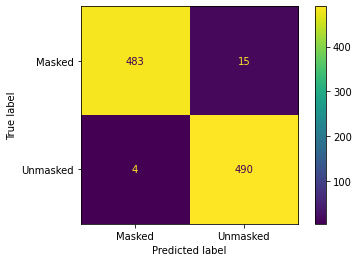

In [45]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Masked','Unmasked'])
disp.plot()
plt.show()

In [46]:
acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print('Accuracy => ', acc)

Accuracy =>  0.9808467741935484
